In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

In [36]:
today = date.today()
day = today.strftime("%Y %m %d")
day

'2021 04 16'

In [2]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['ushuaia', 'goderich', 'port macquarie', 'aloleng', 'san patricio', 'sangar', 'dickinson', 'puerto ayora', 'praia da vitoria', 'cape town', 'magadi', 'albany', 'luanda', 'hithadhoo', 'huangnihe', 'mbuguni', 'rikitea', 'ilulissat', 'kodiak', 'faya', 'illoqqortoormiut', 'samusu', 'busselton', 'saint-joseph', 'jamestown', 'margate', 'beloha', 'nome', 'mataura', 'saint-philippe', 'yellowknife', 'khormuj', 'saskylakh', 'anuradhapura', 'antalaha', 'tsihombe', 'severnoye', 'avarua', 'east london', 'dong hoi', 'nikolskoye', 'chuy', 'labuhan', 'mormugao', 'tanete', 'utiroa', 'castro', 'kapaa', 'tuatapere', 'preobrazheniye', 'vallenar', 'nanortalik', 'port alfred', 'poum', 'georgetown', 'kaitangata', 'burnie', 'tasiilaq', 'cherskiy', 'velikie luki', 'la huaca', 'sur', 'vaini', 'saldanha', 'sokoni', 'lebanon', 'lambarene', 'igrim', 'cap malheureux', 'sobolevo', 'fare', 'bilibino', 'iqaluit', 'cabo san lucas', 'tolga', 'orje', 'nizhneyansk', 'touros', 'lavrentiya', 'codrington', 'qabis', 'vaitupu

In [32]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# weather_api_key = "117dc3b2338db533eebb9a9c407cc7e0"
query_url = url + "appid=" + weather_api_key + "&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=117dc3b2338db533eebb9a9c407cc7e0&q=


In [9]:
test = requests.get(query_url + cities[1]).json()
test

{'coord': {'lon': -81.7165, 'lat': 43.7501},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 277.15,
  'feels_like': 274.8,
  'temp_min': 277.15,
  'temp_max': 277.15,
  'pressure': 1014,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 2.57, 'deg': 360},
 'clouds': {'all': 100},
 'dt': 1618627464,
 'sys': {'type': 1,
  'id': 253,
  'country': 'CA',
  'sunrise': 1618569698,
  'sunset': 1618618266},
 'timezone': -14400,
 'id': 5962442,
 'name': 'Goderich',
 'cod': 200}

In [33]:
name = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []
y = 1

print("Beginning Data Retrieval")
print("--------------------------------")

for c in cities:
    try:
        city = requests.get(query_url + c).json()
        name.append(city["name"])
        lat.append(city["coord"]["lat"])
        lng.append(city["coord"]["lon"])
        temp.append(city["main"]["temp"])
        humidity.append(city["main"]["humidity"])
        cloudiness.append(city["clouds"]["all"])
        wind.append(city["wind"]["speed"])
        country.append(city["sys"]["country"])
        date.append(city["dt"])
        print(f"Processing Record {y} | {c}")
        y = y+1
    except:
        print("City not found. Skipping ...")



Beginning Data Retrieval
--------------------------------
Processing Record 1 | ushuaia
Processing Record 2 | goderich
Processing Record 3 | port macquarie
Processing Record 4 | aloleng
Processing Record 5 | san patricio
Processing Record 6 | sangar
Processing Record 7 | dickinson
Processing Record 8 | puerto ayora
Processing Record 9 | praia da vitoria
Processing Record 10 | cape town
Processing Record 11 | magadi
Processing Record 12 | albany
Processing Record 13 | luanda
Processing Record 14 | hithadhoo
Processing Record 15 | huangnihe
Processing Record 16 | mbuguni
Processing Record 17 | rikitea
Processing Record 18 | ilulissat
Processing Record 19 | kodiak
Processing Record 20 | faya
City not found. Skipping ...
City not found. Skipping ...
Processing Record 21 | busselton
Processing Record 22 | saint-joseph
Processing Record 23 | jamestown
Processing Record 24 | margate
Processing Record 25 | beloha
Processing Record 26 | nome
Processing Record 27 | mataura
Processing Record 28 |

Processing Record 232 | kahului
City not found. Skipping ...
Processing Record 233 | tilichiki
Processing Record 234 | rakai
Processing Record 235 | bambous virieux
Processing Record 236 | kem
Processing Record 237 | yichang
Processing Record 238 | vao
Processing Record 239 | kupang
Processing Record 240 | airai
Processing Record 241 | port hardy
Processing Record 242 | yenagoa
Processing Record 243 | witu
Processing Record 244 | salalah
Processing Record 245 | matara
Processing Record 246 | onega
Processing Record 247 | fairbanks
Processing Record 248 | kolchugino
Processing Record 249 | lorengau
Processing Record 250 | upernavik
City not found. Skipping ...
Processing Record 251 | erenhot
Processing Record 252 | norman wells
Processing Record 253 | caraballeda
Processing Record 254 | pisco
Processing Record 255 | atar
Processing Record 256 | kiunga
City not found. Skipping ...
Processing Record 257 | ishigaki
Processing Record 258 | maragogi
Processing Record 259 | safaga
Processing 

Processing Record 466 | tigil
City not found. Skipping ...
Processing Record 467 | acapulco
Processing Record 468 | soller
Processing Record 469 | harper
Processing Record 470 | caravelas
Processing Record 471 | fort william
Processing Record 472 | sete
Processing Record 473 | syamzha
Processing Record 474 | zhoucheng
Processing Record 475 | yaan
Processing Record 476 | riyadh
Processing Record 477 | tiksi
Processing Record 478 | mayfield
Processing Record 479 | berlin
Processing Record 480 | leshukonskoye
Processing Record 481 | sarangani
Processing Record 482 | husavik
Processing Record 483 | japura
Processing Record 484 | silleda
Processing Record 485 | baykit
Processing Record 486 | sainte-thecle
Processing Record 487 | sistranda
Processing Record 488 | oktyabrskoye
Processing Record 489 | luganville
Processing Record 490 | amapa
Processing Record 491 | wanaka
Processing Record 492 | hanzhong
Processing Record 493 | nagaur
Processing Record 494 | utete
Processing Record 495 | tizni

In [17]:
name

['Ushuaia',
 'Goderich',
 'Port Macquarie',
 'Aloleng',
 'San Patricio',
 'Sangar',
 'Dickinson',
 'Puerto Ayora',
 'Praia da Vitória',
 'Cape Town',
 'Māgadi',
 'Albany',
 'Luanda',
 'Hithadhoo',
 'Huangnihe',
 'Mbuguni',
 'Rikitea',
 'Ilulissat',
 'Saint Paul Harbor',
 'Faya']

In [23]:
city_df = pd.DataFrame({"City": name,
                       "Lat": lat,
                       "Lng": lng,
                       "Max Temp": temp,
                       "Humidity": humidity,
                       "Cloudiness": cloudiness,
                       "Wind Speed": wind,
                       "Country": country,
                       "Date": date
                       })
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,279.15,75,90,2.06,AR,1618627466
1,Goderich,43.7501,-81.7165,277.15,87,100,2.57,CA,1618627464
2,Port Macquarie,-31.4333,152.9167,287.91,100,90,4.63,AU,1618627267
3,Aloleng,16.1307,119.7824,302.63,66,98,4.93,PH,1618627469
4,San Patricio,28.0170,-97.5169,297.07,94,90,3.09,US,1618627483
...,...,...,...,...,...,...,...,...,...
557,Huilong,31.8111,121.6550,291.16,74,95,0.89,CN,1618627877
558,Kargil,34.5667,76.1000,274.24,73,100,1.49,IN,1618627877
559,Takoradze,4.8845,-1.7554,298.79,86,87,1.64,GH,1618627878
560,Mayo,38.8876,-76.5119,283.32,60,5,3.13,US,1618627854


In [8]:
city_df.describe

<bound method NDFrame.describe of               City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0     Puerto Ayora  -0.7393  -90.3518    297.59        97          94   
1           Torbay  47.6666  -52.7314    273.25        93          90   
2          Mareeba -17.0000  145.4333    303.01        58          90   
3           Hasaki  35.7333  140.8333    291.01        63          75   
4     Punta Arenas -53.1500  -70.9167    282.09        71           0   
..             ...      ...       ...       ...       ...         ...   
570          Mahon  39.8885    4.2658    283.15        57           0   
571     Kralendijk  12.1500  -68.2667    300.15        83          75   
572       Seymchan  62.8833  152.4333    268.70        71          19   
573      Nantucket  41.2835  -70.0995    276.84        93          90   
574  Stevens Point  44.5236  -89.5746    279.36        49           1   

     Wind Speed Country        Date  
0          1.34      EC  1618625881  
1          5.

In [9]:
#save to csv
pd.DataFrame.to_csv(city_df, "city.csv")

In [10]:
humidity_over_100 = city_df.loc[city_df["Humidity"]>100]
print(humidity_over_100)

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


There are no cities with humidity over 100%

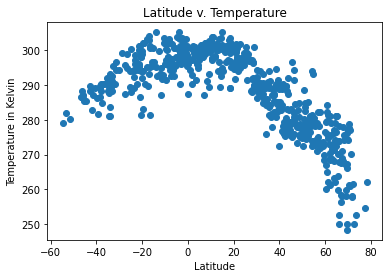

In [11]:
#lat versus temp scatter
plt.scatter(city_df["Lat"],city_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature in Kelvin")
plt.title(f"Latitude v. Temperature")
plt.show()

This scatter plot shows the relationship between the latitude of different cities versus their temperatures in Kelvin.

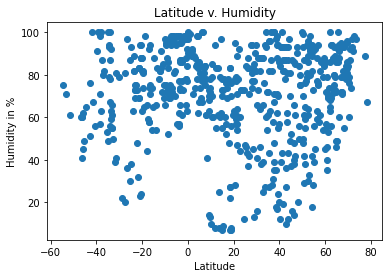

In [12]:
#lat versus humidity scatter
plt.scatter(city_df["Lat"],city_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity in %")
plt.title("Latitude v. Humidity")
plt.show()

This scatter plot shows the relationship between the latitude of different cities versus their humidity percentage.

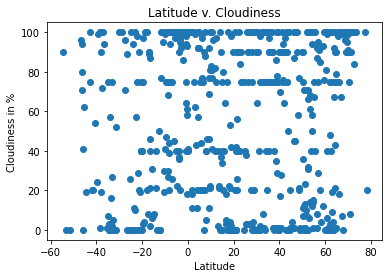

In [13]:
#lat versus cloudiness scatter
plt.scatter(city_df["Lat"],city_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness in %")
plt.title("Latitude v. Cloudiness")
plt.show()

This scatter plot shows the relationship between the latitude of different cities versus their cloudiness percentage.

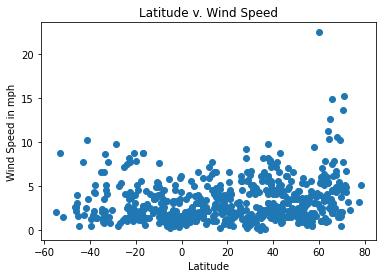

In [14]:
#lat versus wind scatter
plt.scatter(city_df["Lat"],city_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed in mph")
plt.title("Latitude v. Wind Speed")
plt.show()

This scatter plot shows the relationship between the latitude of different cities versus their wind speed in miles per hour.

In [30]:
northern_hem = city_df.loc[city_df["Lat"]>=0]
southern_hem = city_df.loc[city_df["Lat"]<0]

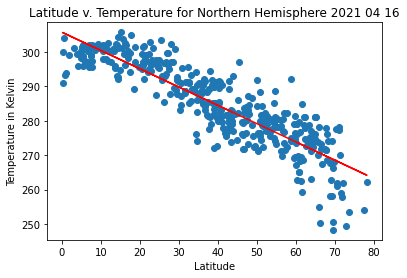

In [37]:
#northern lat versus temp scatter
x_value = northern_hem["Lat"]
y_value = northern_hem["Max Temp"]
plt.scatter(x_value, y_value, marker = "o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
plt.plot(x_value, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Temperature in Kelvin")
plt.title(f"Latitude v. Temperature for Northern Hemisphere {day}")
plt.show()

In [17]:
print(f"y = {slope}x +{intercept}")
print(rvalue**2)

y = -0.5298012732123137x +305.43315462393775
0.7745547749972692


In this scatter plot, it shows the relationship between cities with latitudes above 0 degrees and their temperature. There is a strong positive correlation between the two.

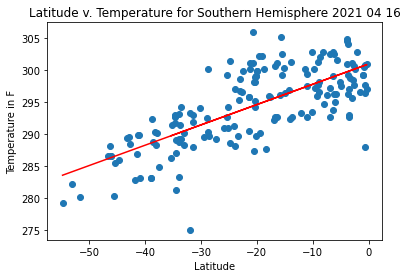

In [38]:
#southern lat versus temp scatter
x_value = southern_hem["Lat"]
y_value = southern_hem["Max Temp"]
plt.scatter(x_value, y_value, marker = "o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
plt.plot(x_value, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Temperature in F")
plt.title(f"Latitude v. Temperature for Southern Hemisphere {day}")
plt.show()

In [19]:
print(f"y = {slope}x +{intercept}")
print(rvalue**2)

y = 0.3063702048388765x +300.5903751412291
0.5126456569270549


In this scatter plot, it shows the relationship between cities with latitudes below 0 degrees and their temperature. There is a weak positive correlation between the two.

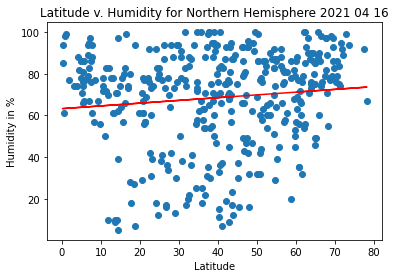

In [39]:
#northern lat versus humidity scatter
x_value = northern_hem["Lat"]
y_value = northern_hem["Humidity"]
plt.scatter(x_value, y_value, marker = "o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
plt.plot(x_value, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Humidity in %")
plt.title(f"Latitude v. Humidity for Northern Hemisphere {day}")
plt.show()

In [21]:
print(f"y = {slope}x +{intercept}")
print(rvalue**2)

y = 0.14371792655671575x +63.19870548322635
0.015879174426344147


In this scatter plot, it shows the relationship between cities with latitudes above 0 degrees and their humidity percentage. There is a very weak positive correlation between the two.

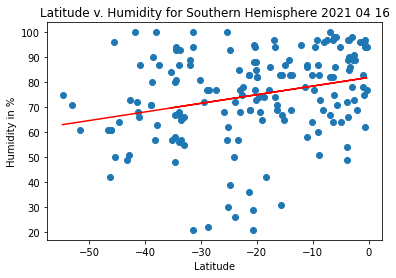

In [40]:
#southern lat versus humidity scatter
x_value = southern_hem["Lat"]
y_value = southern_hem["Humidity"]
plt.scatter(x_value, y_value, marker = "o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
plt.plot(x_value, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Humidity in %")
plt.title(f"Latitude v. Humidity for Southern Hemisphere {day}")
plt.show()

In [23]:
print(f"y = {slope}x +{intercept}")
print(rvalue**2)

y = 0.3994200635824724x +82.43220674164746
0.09616940480937963


In this scatter plot, it shows the relationship between cities with latitudes below 0 degrees and their humidity percentage. There is a very weak positive correlation between the two.

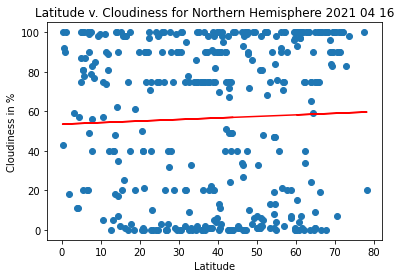

In [41]:
#northern lat versus cloudiness scatter
x_value = northern_hem["Lat"]
y_value = northern_hem["Cloudiness"]
plt.scatter(x_value, y_value, marker = "o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
plt.plot(x_value, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness in %")
plt.title(f"Latitude v. Cloudiness for Northern Hemisphere {day}")
plt.show()

In [25]:
print(f"y = {slope}x +{intercept}")
print(rvalue**2)

y = 0.21654164812129048x +47.138788136950154
0.013044528213498767


In this scatter plot, it shows the relationship between cities with latitudes above 0 degrees and their cloudiness percentage. There is a very weak positive correlation between the two.

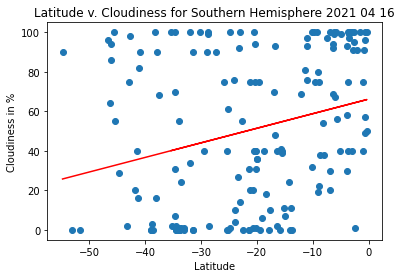

In [42]:
#southern lat versus cloudiness scatter
x_value = southern_hem["Lat"]
y_value = southern_hem["Cloudiness"]
plt.scatter(x_value, y_value, marker = "o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
plt.plot(x_value, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness in %")
plt.title(f"Latitude v. Cloudiness for Southern Hemisphere {day}")
plt.show()

In [27]:
print(f"y = {slope}x +{intercept}")
print(rvalue**2)

y = 0.8921131186478193x +70.63923795561237
0.09987488909018132


In this scatter plot, it shows the relationship between cities with latitudes below 0 degrees and their cloudiness percentage. There is a very weak positive correlation between the two.

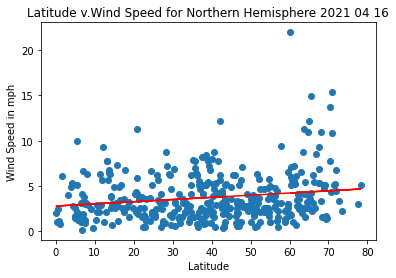

In [43]:
#northern lat versus wind speed scatter
x_value = northern_hem["Lat"]
y_value = northern_hem["Wind Speed"]
plt.scatter(x_value, y_value, marker = "o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
plt.plot(x_value, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed in mph")
plt.title(f"Latitude v.Wind Speed for Northern Hemisphere {day}")
plt.show()

In [29]:
print(f"y = {slope}x +{intercept}")
print(rvalue**2)

y = 0.030094334211564717x +2.4145458730617824
0.058638567847343614


In this scatter plot, it shows the relationship between cities with latitudes above 0 degrees and their wind speed in mph. There is a very weak positive correlation between the two.

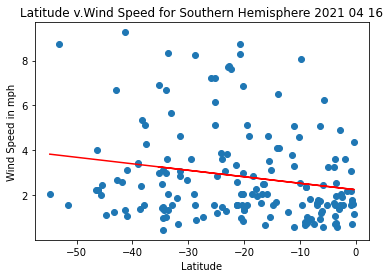

In [44]:
#southern lat versus wind speed scatter
x_value = southern_hem["Lat"]
y_value = southern_hem["Wind Speed"]
plt.scatter(x_value, y_value, marker = "o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
plt.plot(x_value, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed in mph")
plt.title(f"Latitude v.Wind Speed for Southern Hemisphere {day}")
plt.show()

In [31]:
print(f"y = {slope}x +{intercept}")
print(rvalue**2)

y = -0.0253171161104473x +2.4711316540146115
0.026635319898213203


In this scatter plot, it shows the relationship between cities with latitudes below 0 degrees and their wind speed in mph. There is a very weak positive correlation between the two.